## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
merge_df["Mouse ID"].value_counts

<bound method IndexOpsMixin.value_counts of 0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1893, dtype: object>

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
previous_timepoint = None

for index, row in merge_df.iterrows():
    if row['Timepoint'] == previous_timepoint:
        merge_df.drop(index, inplace=True)
    else: 
        previous_timepoint = row['Timepoint']
        
merge_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#done in above section

In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mice = merge_df["Mouse ID"].unique()

number_mice = len(unique_mice)
number_mice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# #calculations

# Regimen_df = merge_df.set_index("Drug Regimen")
                                            
median = merge_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"].rename("Medians")  
mean = merge_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"].rename("Means")                                                          
variance = merge_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"].rename("Variance")   
std = merge_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"].rename("Standard Deviation")   
sem = merge_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"].rename("SEM")   

# #create dataframe
regimen_analysis = pd.DataFrame({"Median": median, "Mean": mean, "Variance": variance, "Standard Deviation": std, "Standard Error of the Mean": sem})
regimen_analysis
# Assemble the resulting series into a single summary dataframe.



,Median,Mean,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,41.557809,40.675741,24.947764,4.994774,0.329346
Ceftamin,51.887253,52.677435,39.073142,6.250851,0.471176
Infubinol,51.820584,52.884795,43.128684,6.567243,0.492236
Ketapril,53.739593,55.345698,68.149888,8.255295,0.605308
Naftisol,52.556066,54.484541,65.805367,8.112051,0.599660
Placebo,52.316010,54.083767,61.051374,7.813538,0.582387
Propriva,50.965298,52.441163,43.061679,6.562140,0.527084
Ramicane,40.673236,40.216745,23.486704,4.846308,0.320955
Stelasyn,52.488221,54.284444,59.303779,7.700895,0.573991


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#(summary table created above)
# Using the aggregation method, produce the same summary statistics in a single line
agg_reg = regimen_analysis.aggregate(func=list)
agg_reg

,Median,Mean,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,41.557809,40.675741,24.947764,4.994774,0.329346
Ceftamin,51.887253,52.677435,39.073142,6.250851,0.471176
Infubinol,51.820584,52.884795,43.128684,6.567243,0.492236
Ketapril,53.739593,55.345698,68.149888,8.255295,0.605308
Naftisol,52.556066,54.484541,65.805367,8.112051,0.599660
Placebo,52.316010,54.083767,61.051374,7.813538,0.582387
Propriva,50.965298,52.441163,43.061679,6.562140,0.527084
Ramicane,40.673236,40.216745,23.486704,4.846308,0.320955
Stelasyn,52.488221,54.284444,59.303779,7.700895,0.573991


## Bar and Pie Charts

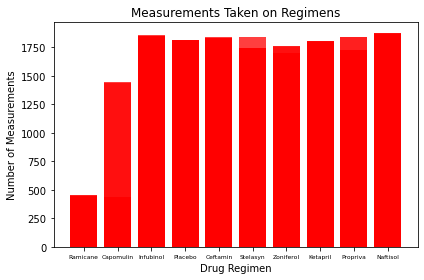

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drugs = merge_df["Drug Regimen"]
y_axis = np.arange(len(drugs))

plt.bar(drugs, y_axis, color='red', alpha=0.5, align="center")
plt.title(f"Measurements Taken on Regimens")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")


#set parameters for tick labels
plt.tick_params(axis='x', which='major', labelsize=6)

plt.tight_layout()

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#(done above)

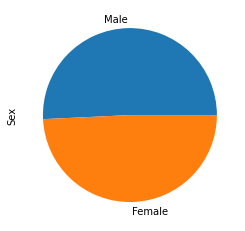

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

merge_df.Sex.value_counts().plot(kind='pie')


<ipython-input-13-9f143ee6b765>:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(Amount, labels=Sexes, shadow=True, startangle=90)


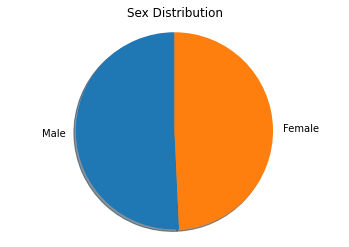

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Sexes = ["Male", "Female"]
Amount = [merge_df["Sex"].value_counts()]
plt.title("Sex Distribution")
plt.pie(Amount, labels=Sexes, shadow=True, startangle=90)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
